# Titanic survived Project 

## Import Packages

In [148]:
import pandas as pd
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

## Import Dataset

In [149]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analysis

In [150]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [151]:
data.shape

(891, 12)

In [152]:
data.duplicated().sum()

0

## Dropping Unnecessary Columns

In [153]:
data = data.drop(columns=['Name', 'PassengerId'], axis=1)

In [154]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


## Null values

In [155]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Encoding

In [156]:
le = LabelEncoder()

In [157]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [158]:
data.Sex = le.fit_transform(data.Sex)
data.Ticket = le.fit_transform(data.Ticket)
data.Embarked = le.fit_transform(data.Embarked)
data.Cabin = le.fit_transform(data.Cabin)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,523,7.2500,147,2
1,1,1,0,38.0,1,0,596,71.2833,81,0
2,1,3,0,26.0,0,0,669,7.9250,147,2
3,1,1,0,35.0,1,0,49,53.1000,55,2
4,0,3,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,147,2
887,1,1,0,19.0,0,0,14,30.0000,30,2
888,0,3,0,NaN,1,2,675,23.4500,147,2
889,1,1,1,26.0,0,0,8,30.0000,60,0


## Imputing the Null values

In [159]:
impute = IterativeImputer()

In [160]:
imp = pd.DataFrame(impute.fit_transform(data[['Age']]), columns=['Age'])
imp1 = pd.DataFrame(impute.fit_transform(data[['Cabin']]), columns=['Cabin'])
imp2 = pd.DataFrame(impute.fit_transform(data[['Embarked']]), columns=['Embarked'])

In [161]:
data['Age'] = imp
data['Cabin'] = imp1
data['Embarked'] = imp2

In [162]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,147.0,2.0
1,1,1,0,38.000000,1,0,596,71.2833,81.0,0.0
2,1,3,0,26.000000,0,0,669,7.9250,147.0,2.0
3,1,1,0,35.000000,1,0,49,53.1000,55.0,2.0
4,0,3,1,35.000000,0,0,472,8.0500,147.0,2.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,147.0,2.0
887,1,1,0,19.000000,0,0,14,30.0000,30.0,2.0
888,0,3,0,29.699118,1,2,675,23.4500,147.0,2.0
889,1,1,1,26.000000,0,0,8,30.0000,60.0,0.0


## Checking Skewness

In [163]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


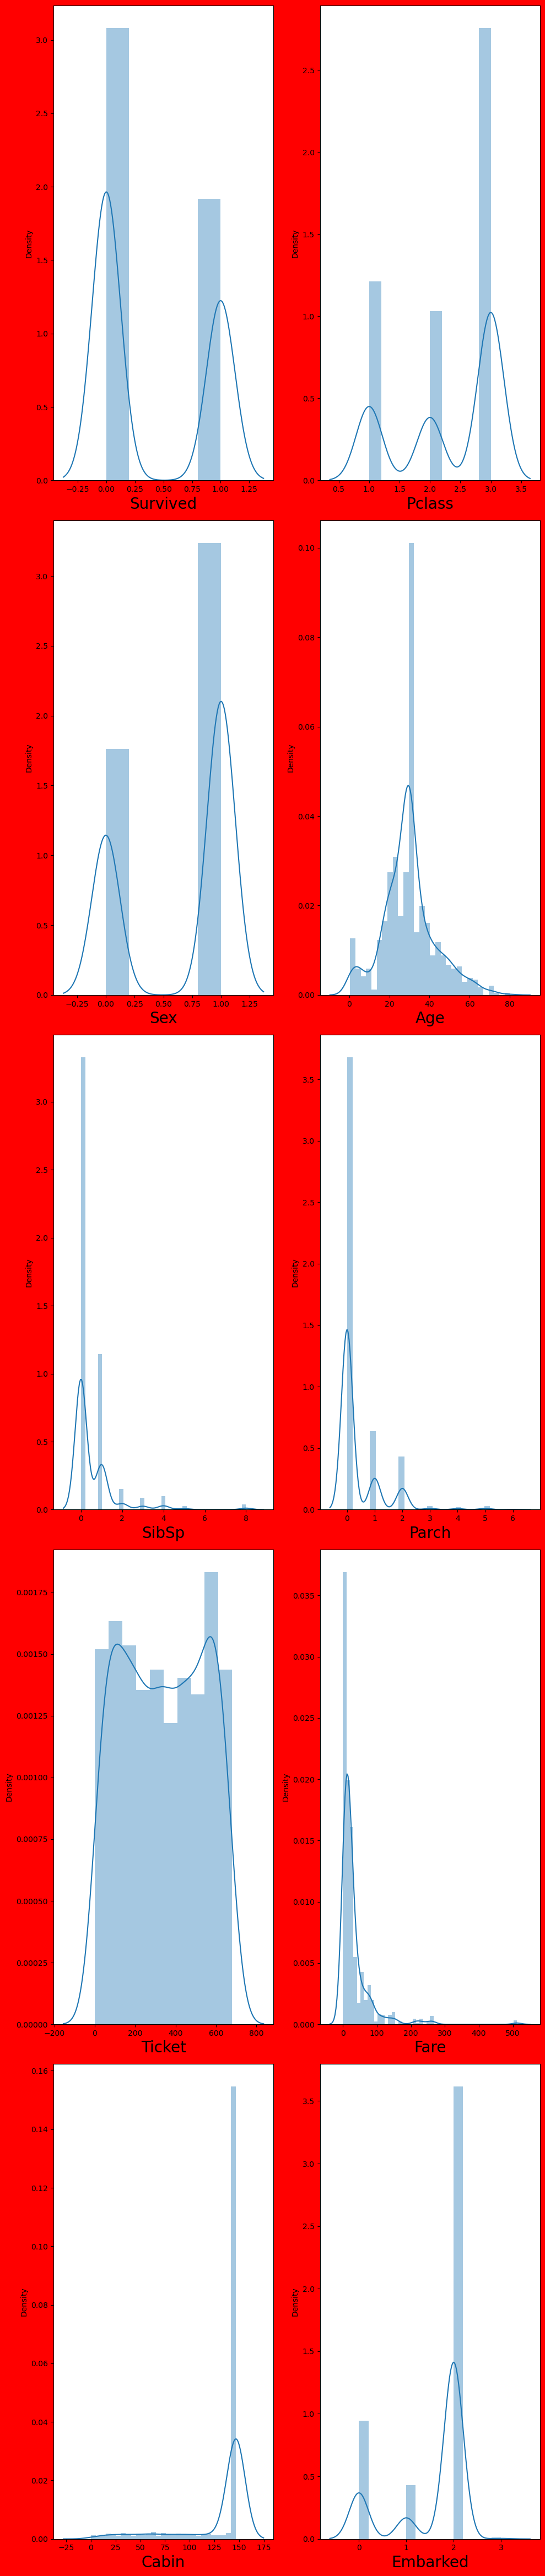

In [164]:
plt.figure(figsize=(10,65), facecolor='red')
plotnumber = 1

for column in data:                       
    if plotnumber<=13:                    
        ax = plt.subplot(7,2,plotnumber)    
        sns.distplot(data[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()   

## Checking Outliners

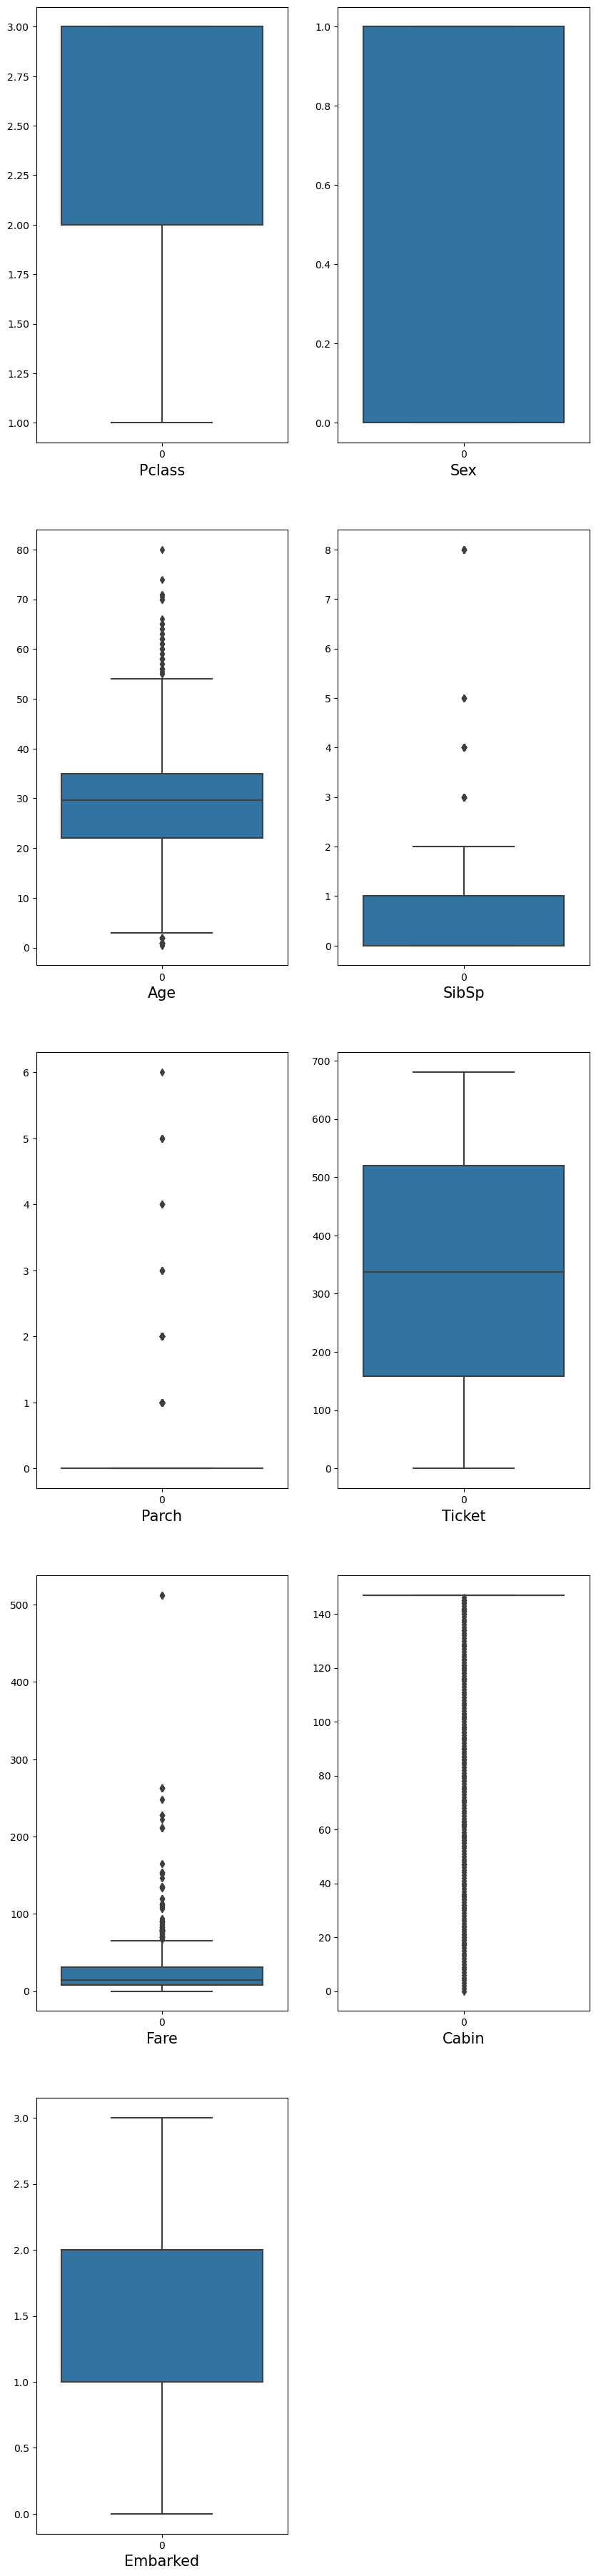

In [165]:

df_features = data.drop('Survived',axis=1)

plt.figure(figsize=(10,65))
graph = 1

for column in df_features:  
    if graph<=13:
        plt.subplot(7,2, graph)
        ax=sns.boxplot(data= df_features [column])
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

## Removing Outliners & Skewness

In [166]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [167]:
from scipy.stats import zscore 

z_score = zscore (data[['Age', 'SibSp', 'Parch','Fare', 'Cabin', 'Embarked']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.5).all(axis=1)
data = data[filtering_entry]

data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,0.375648,2.386010,0.663212,29.159748,0.356218,0.252591,340.334197,24.093797,137.641192,1.559585
std,0.484604,0.786535,0.472918,11.574650,0.629001,0.562264,196.086668,28.562466,24.013928,0.772634
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,166.750000,7.895800,147.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,340.500000,13.000000,147.000000,2.000000
75%,1.000000,3.000000,1.000000,34.000000,1.000000,0.000000,511.250000,26.000000,147.000000,2.000000
max,1.000000,3.000000,1.000000,62.000000,3.000000,2.000000,679.000000,153.462500,147.000000,2.000000


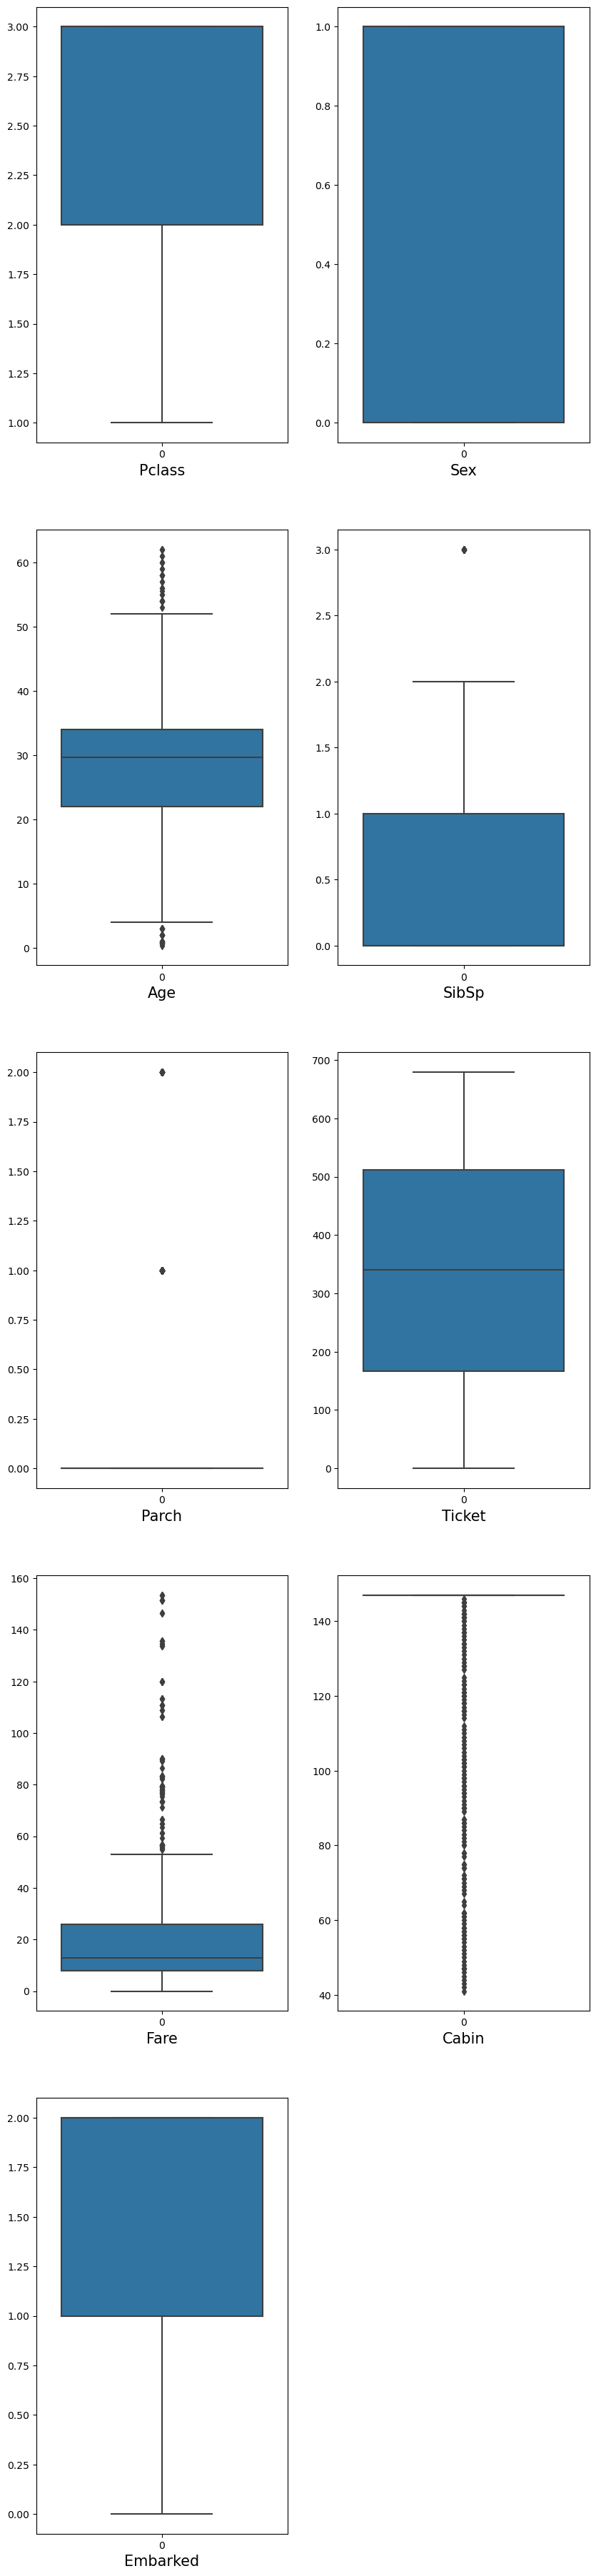

In [168]:
df_features = data.drop('Survived',axis=1)

plt.figure(figsize=(10,65))
graph = 1

for column in df_features:        
    if graph<=13:
        plt.subplot(7,2, graph)
        ax=sns.boxplot(data= df_features [column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

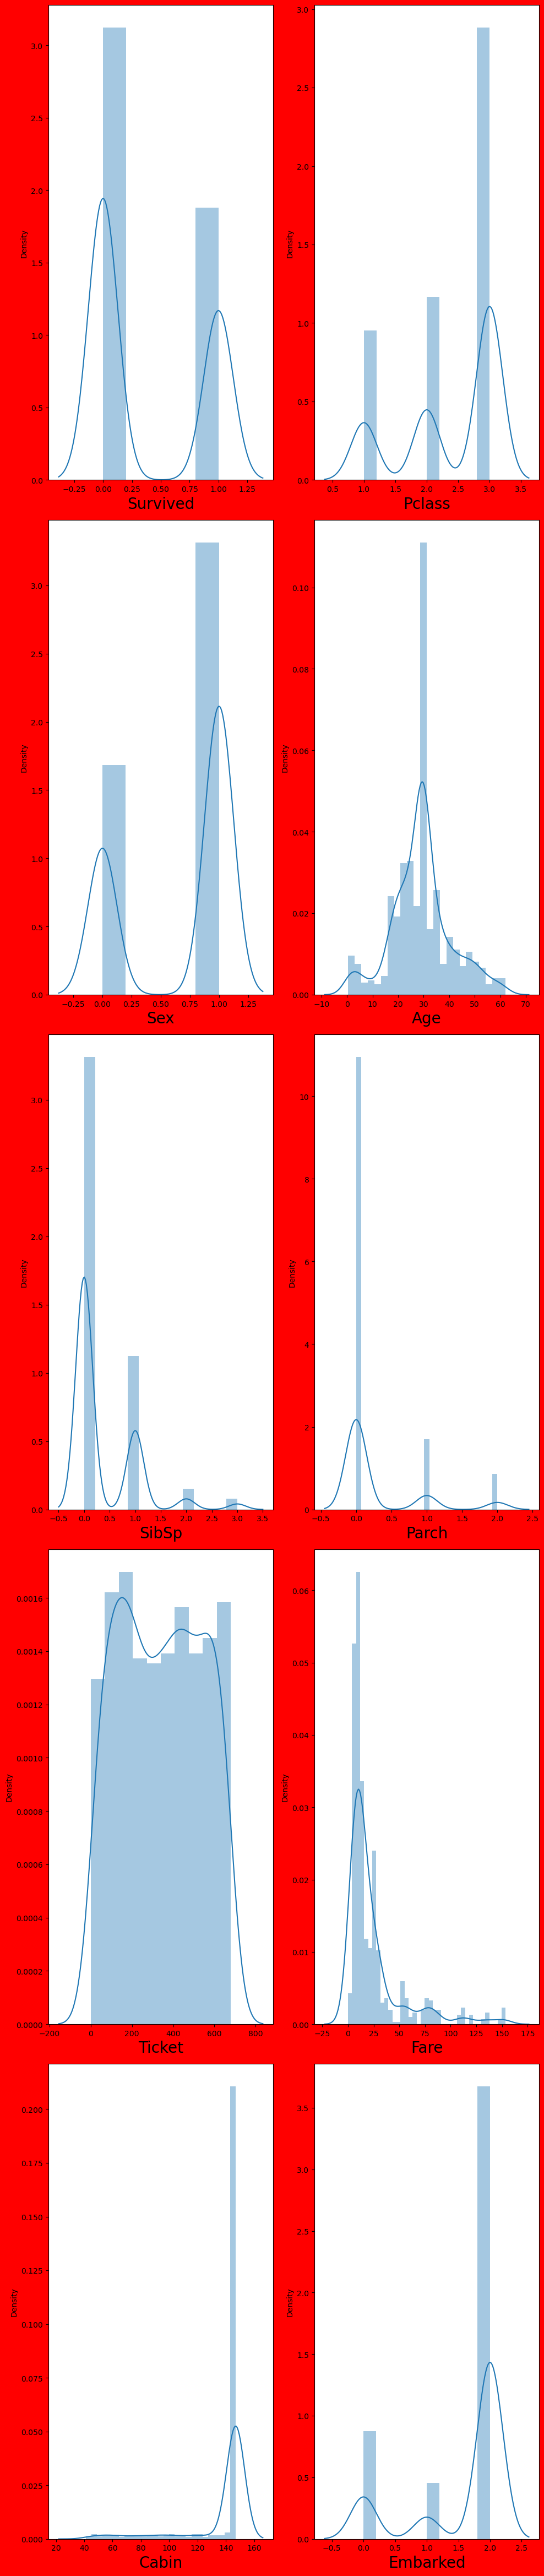

In [169]:
plt.figure(figsize=(10,65), facecolor='red')
plotnumber = 1

for column in data:                       
    if plotnumber<=13:                    
        ax = plt.subplot(7,2,plotnumber)    
        sns.distplot(data[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()   

In [170]:
data.shape

(772, 10)

## Checking Multicollinearity

In [171]:
corr = data.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.309464,-0.545183,-0.103894,0.092322,0.193969,-0.151916,0.296369,-0.232487,-0.139531
Pclass,-0.309464,1.000000,0.133768,-0.312035,-0.073807,-0.077051,0.320715,-0.693742,0.645352,0.094429
Sex,-0.545183,0.133768,1.000000,0.098707,-0.206602,-0.250357,0.066239,-0.218414,0.111091,0.122435
Age,-0.103894,-0.312035,0.098707,1.000000,-0.151739,-0.276751,-0.067980,0.145181,-0.217243,0.016604
SibSp,0.092322,-0.073807,-0.206602,-0.151739,1.000000,0.324699,-0.015962,0.262981,-0.070783,-0.015709
Parch,0.193969,-0.077051,-0.250357,-0.276751,0.324699,1.000000,-0.036376,0.245477,-0.075506,-0.012298
Ticket,-0.151916,0.320715,0.066239,-0.067980,-0.015962,-0.036376,1.000000,-0.130530,0.213909,0.009833
Fare,0.296369,-0.693742,-0.218414,0.145181,0.262981,0.245477,-0.130530,1.000000,-0.633607,-0.197001
Cabin,-0.232487,0.645352,0.111091,-0.217243,-0.070783,-0.075506,0.213909,-0.633607,1.000000,0.137643
Embarked,-0.139531,0.094429,0.122435,0.016604,-0.015709,-0.012298,0.009833,-0.197001,0.137643,1.000000


In [172]:
corr['Survived']

Survived    1.000000
Pclass     -0.309464
Sex        -0.545183
Age        -0.103894
SibSp       0.092322
Parch       0.193969
Ticket     -0.151916
Fare        0.296369
Cabin      -0.232487
Embarked   -0.139531
Name: Survived, dtype: float64

In [173]:
x = data.drop(columns = ['Survived'])
y = data['Survived']


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,Pclass,23.889966
1,Sex,3.293147
2,Age,7.559243
3,SibSp,1.600050
4,Parch,1.547252
5,Ticket,4.596500
6,Fare,2.588248
7,Cabin,34.593705
8,Embarked,5.183006


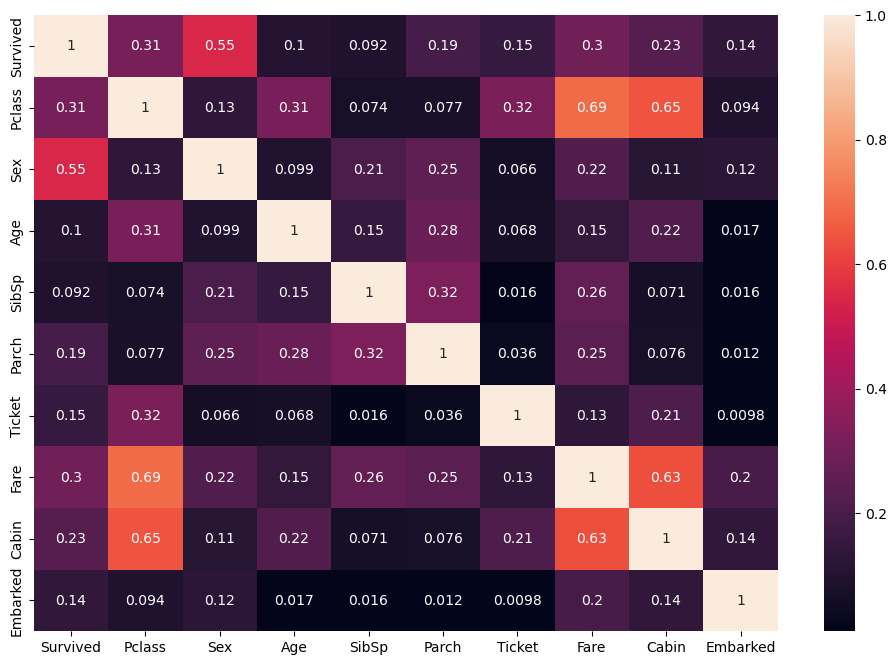

In [174]:
df_corr = data.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

## Separating Features & Labels

In [175]:
Features = data.drop(columns=['Survived'],axis=1)
Label = data.Survived

## Standardizing Features

In [176]:
scaler = StandardScaler()
Features_scaled = scaler.fit_transform(Features)

In [177]:
Features_scaled

array([[ 0.78113241,  0.71260964, -0.61897243, ..., -0.5901002 ,
         0.38997683,  0.57038631],
       [-1.76331577, -1.40329283,  0.76425491, ...,  1.65322192,
        -2.36020993, -2.01983857],
       [ 0.78113241, -1.40329283, -0.2731656 , ..., -0.56645247,
         0.38997683,  0.57038631],
       ...,
       [ 0.78113241, -1.40329283,  0.04662945, ..., -0.02255459,
         0.38997683,  0.57038631],
       [-1.76331577,  0.71260964, -0.2731656 , ...,  0.20691601,
        -3.23526935, -2.01983857],
       [ 0.78113241,  0.71260964,  0.24554466, ..., -0.57258336,
         0.38997683, -0.72472613]])

## Test - Train Split

In [178]:
x_train,x_test,y_train,y_test = train_test_split(Features_scaled, Label, test_size = 0.25, random_state=348)

# Logistic Regression

### Creating Logistic Regression model

In [179]:
cls_reg = LogisticRegression()

In [180]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [181]:
cls_reg.coef_

array([[-0.66004463, -1.23959361, -0.47852375, -0.29959023,  0.20539149,
        -0.08047868,  0.23476404, -0.05181716, -0.09365162]])

In [182]:
cls_reg.intercept_

array([-0.58396095])

In [183]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.8082901554404145


In [184]:
y_pred = cls_reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [185]:
print('Accuracy Score:',cls_reg.score(x_test, y_test))

Accuracy Score: 0.7564766839378239


In [186]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[100,  24],
       [ 23,  46]], dtype=int64)

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       124
           1       0.66      0.67      0.66        69

    accuracy                           0.76       193
   macro avg       0.74      0.74      0.74       193
weighted avg       0.76      0.76      0.76       193



In [188]:
r2_score(y_test, y_pred)

-0.060191678354371225

In [189]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [190]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.66666667 1.        ]
False Positive rate =  [0.         0.19354839 1.        ]


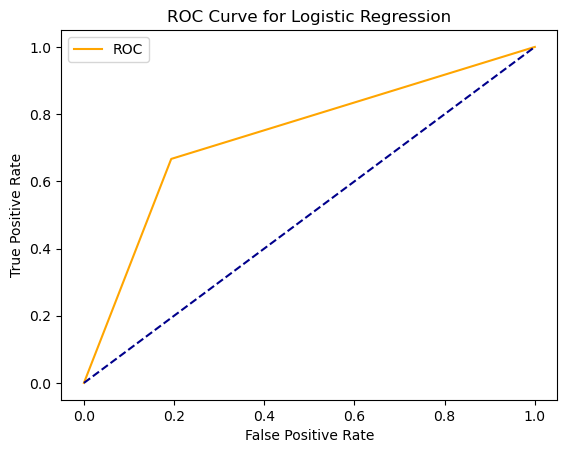

In [191]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

In [192]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

0.736559139784946


# DecisionTreeClassifier

In [49]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'splitter': 'best'}

## Creating DecisionTreeClassifier model

In [79]:
cls_dec = DecisionTreeClassifier(criterion='gini',min_samples_leaf= 1, min_samples_split=2,max_depth=16)

In [80]:
cls_dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16)

In [81]:
print('Accuracy Score:',cls_dec.score(x_train, y_train))

Accuracy Score: 0.9861830742659758


In [82]:
y_pred = cls_dec.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [83]:
print('Accuracy Score:',cls_dec.score(x_test, y_test))

Accuracy Score: 0.772020725388601


In [84]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[100,  24],
       [ 20,  49]], dtype=int64)

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       124
           1       0.67      0.71      0.69        69

    accuracy                           0.77       193
   macro avg       0.75      0.76      0.75       193
weighted avg       0.78      0.77      0.77       193



In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [87]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.71014493 1.        ]
False Positive rate =  [0.         0.19354839 1.        ]


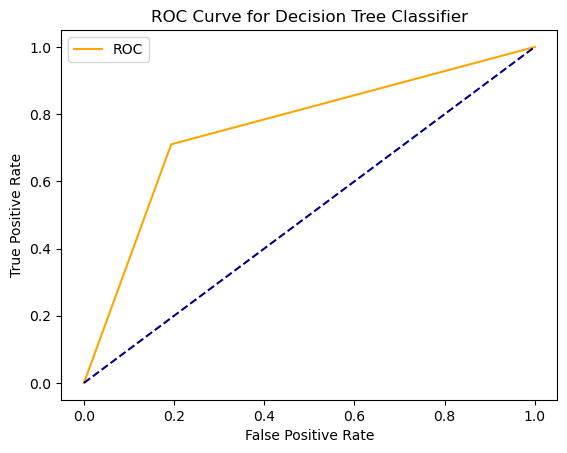

In [88]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

In [89]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

0.7582982702197288


# Random Forest Classifier

## Creating Random Forest Classifier model

In [148]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [91]:
cls_rf = RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=16)

In [92]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=450)

In [93]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 0.9879101899827288


In [94]:
y_pred = cls_rf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [95]:
print('Accuracy Score:',cls_rf.score(x_test, y_test))

Accuracy Score: 0.8238341968911918


In [96]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[108,  16],
       [ 18,  51]], dtype=int64)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       124
           1       0.76      0.74      0.75        69

    accuracy                           0.82       193
   macro avg       0.81      0.81      0.81       193
weighted avg       0.82      0.82      0.82       193



In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [99]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.73913043 1.        ]
False Positive rate =  [0.         0.12903226 1.        ]


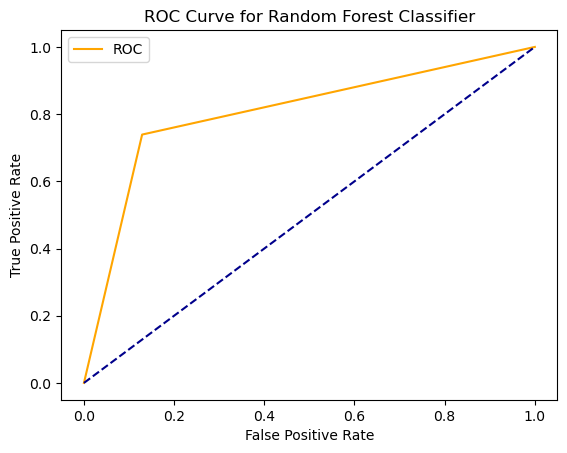

In [100]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

In [101]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

0.8050490883590462


# KNeighbors Classifier

## Creating KNeighborsClassifier Model

In [103]:
cls_KN = KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance')

In [104]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3, p=1, weights='distance')

In [105]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 1.0


In [106]:
y_pred = cls_KN.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [107]:
print('Accuracy Score:',cls_KN.score(x_test, y_test))

Accuracy Score: 0.7823834196891192


In [108]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[97, 27],
       [15, 54]], dtype=int64)

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       124
           1       0.67      0.78      0.72        69

    accuracy                           0.78       193
   macro avg       0.77      0.78      0.77       193
weighted avg       0.79      0.78      0.79       193



In [110]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [111]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.        0.7826087 1.       ]
False Positive rate =  [0.         0.21774194 1.        ]


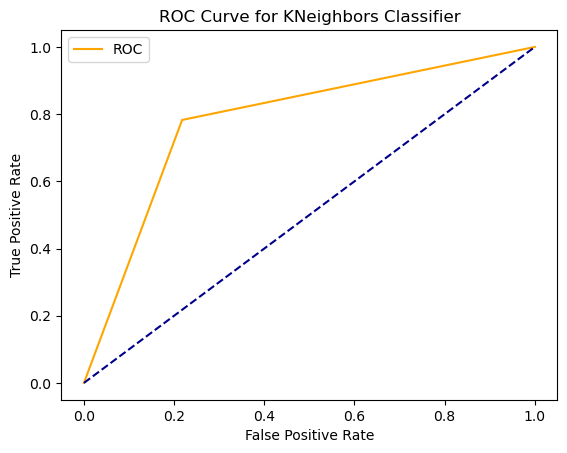

In [112]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighbors Classifier')
plt.legend()
plt.show()

In [113]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

0.7824333800841514


# Support Vector Classifier

## Creating Support Vector Classifier model

In [115]:
from sklearn.svm import SVC

In [116]:
cls_SVC = SVC(kernel='rbf',C=500, gamma=20)

In [117]:
cls_SVC.fit(x_train, y_train)

SVC(C=500, gamma=20)

In [118]:
print('Accuracy Score:',cls_SVC.score(x_train, y_train))

Accuracy Score: 0.9948186528497409


In [119]:
y_pred = cls_SVC.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [120]:
print('Accuracy Score:',cls_SVC.score(x_test, y_test))

Accuracy Score: 0.689119170984456


In [121]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[114,  10],
       [ 50,  19]], dtype=int64)

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       124
           1       0.66      0.28      0.39        69

    accuracy                           0.69       193
   macro avg       0.68      0.60      0.59       193
weighted avg       0.68      0.69      0.65       193



In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [124]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.27536232 1.        ]
False Positive rate =  [0.         0.08064516 1.        ]


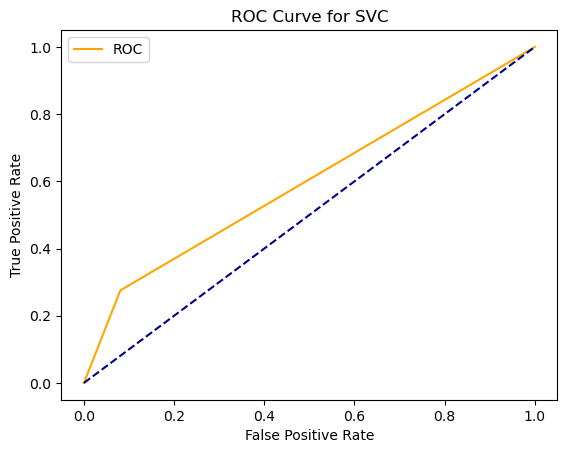

In [125]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend()
plt.show()

In [126]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

0.5973585787751285


# Gradient Boosting Classifier

## Creating Gradient Boosting Classifier model

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
cls_gb = GradientBoostingClassifier(learning_rate=1)

In [129]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1)

In [130]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 1.0


In [131]:
y_pred = cls_gb.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [132]:
print('Accuracy Score:',cls_gb.score(x_test, y_test))

Accuracy Score: 0.7772020725388601


In [133]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[103,  21],
       [ 22,  47]], dtype=int64)

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       124
           1       0.69      0.68      0.69        69

    accuracy                           0.78       193
   macro avg       0.76      0.76      0.76       193
weighted avg       0.78      0.78      0.78       193



In [139]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [140]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.68115942 1.        ]
False Positive rate =  [0.         0.16935484 1.        ]


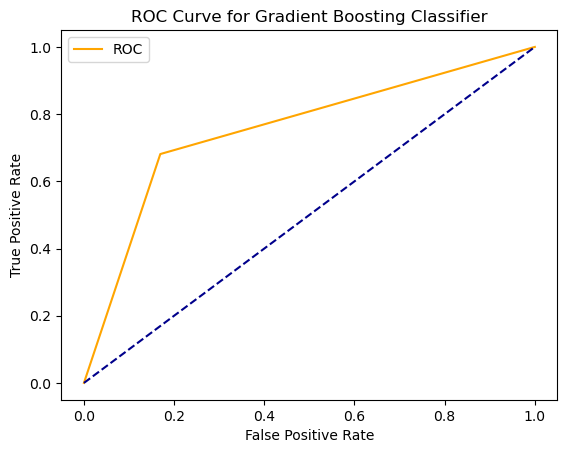

In [141]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend()
plt.show()

In [138]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

0.7559022907900889


# Plotting ROC Curve for all models

In [144]:
from sklearn.metrics import plot_roc_curve

### Training Data

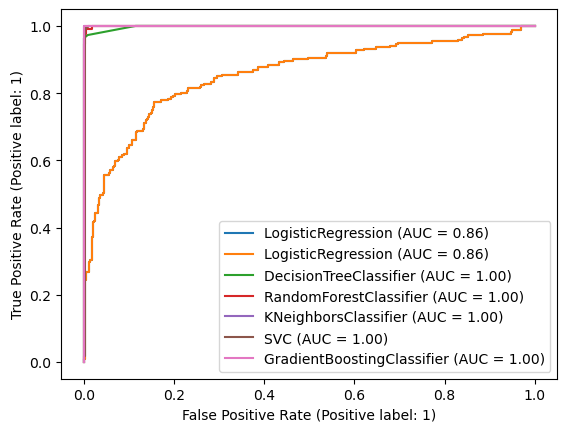

In [146]:
disp = plot_roc_curve (cls_reg, x_train, y_train)

plot_roc_curve (cls_reg, x_train, y_train, ax=disp.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve (cls_dec, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_KN, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_SVC, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_gb, x_train, y_train, ax=disp.ax_)
plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

### Testing Data

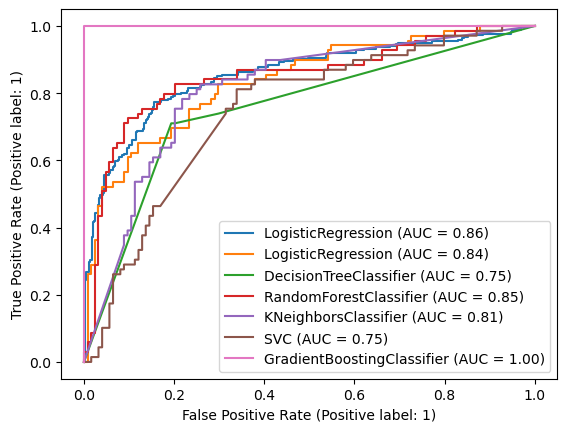

In [147]:
disp = plot_roc_curve (cls_reg, x_train, y_train)

plot_roc_curve (cls_reg, x_test, y_test, ax=disp.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve (cls_dec, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_KN, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_gb, x_train, y_train, ax=disp.ax_)
plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()